Analysis of the Coalescent Simulation
=====================================

In [1]:
library(ggplot2)
library(plyr)
library(reshape2)

Dataset
-------

This is the summary of Spearman's $\rho$ over 10 replicates of the "coalescent" experiment

In [2]:
stats = read.csv("overall.csv")
stats$rep = as.factor(sort(rep(1:10, times=44)))

In [3]:
summary(stats)
table(stats$scale)
table(stats$coverage)

    coverage     measure       scale            spearman             rep     
 Min.   : 0.50   ip :220   Min.   :0.00100   Min.   :-0.03518   1      : 44  
 1st Qu.: 2.00   wip:220   1st Qu.:0.00100   1st Qu.: 0.58933   2      : 44  
 Median :12.00             Median :0.01000   Median : 0.83384   3      : 44  
 Mean   :16.59             Mean   :0.01245   Mean   : 0.70869   4      : 44  
 3rd Qu.:30.00             3rd Qu.:0.01000   3rd Qu.: 0.89488   5      : 44  
 Max.   :50.00             Max.   :0.10000   Max.   : 0.97273   6      : 44  
                                                                (Other):176  


0.001 0.005  0.01  0.02  0.05   0.1 
  180    20   180    20    20    20 


0.5   1   2   4   8  12  15  30  50 
 40  40  40  40  40  40  40 120  40 

We compare average genome coverage and the scale of varaition againsnt accuracy (i.e. Spearman's $\rho$) (over the 10 reps).

We compare the effects of coverage and scale independently.

Coverage vs $\rho$ at 1/100 variation
------------------

A series of average coverages was run at the scale of 0.01 (i.e. an average of 1 variant in 100 bases across all pairwise comparisions of samples)

In [4]:
coverage = stats[stats$scale==0.01, ]
coverage$scale = NULL
summary(coverage)

    coverage     measure     spearman           rep    
 Min.   : 0.50   ip :90   Min.   :0.3145   1      :18  
 1st Qu.: 2.00   wip:90   1st Qu.:0.7592   2      :18  
 Median : 8.00            Median :0.8555   3      :18  
 Mean   :13.61            Mean   :0.8118   4      :18  
 3rd Qu.:15.00            3rd Qu.:0.9029   5      :18  
 Max.   :50.00            Max.   :0.9658   6      :18  
                                           (Other):72  

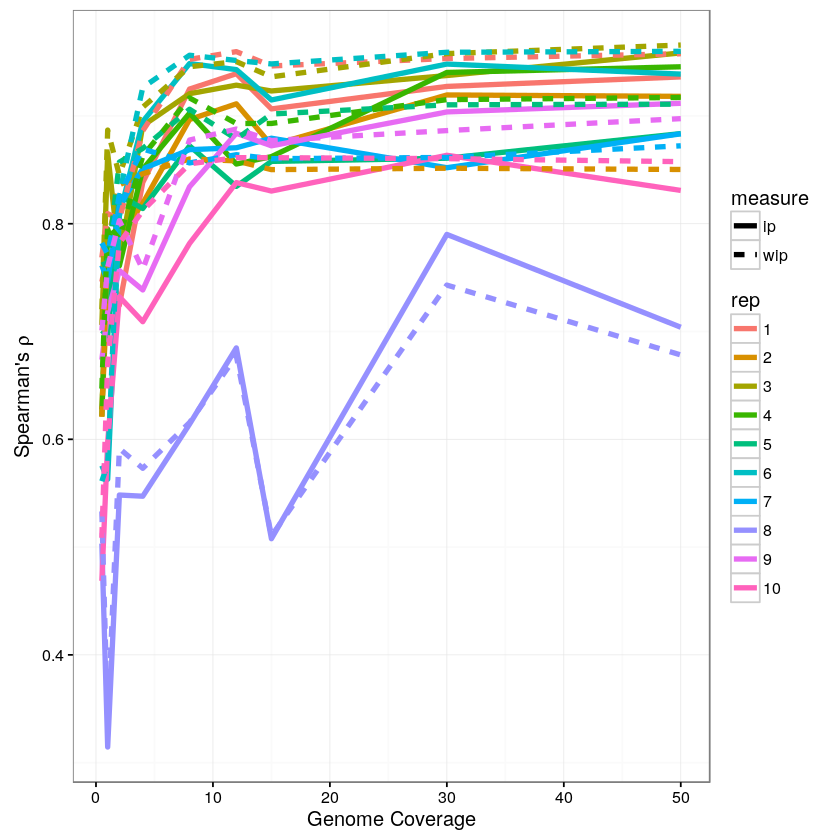

In [5]:
ggplot(coverage, aes(x=coverage, y=spearman, linetype=measure, color=rep)) +
    geom_line(aes(linetype=measure, color=rep),size=1.5) +
    xlab('Genome Coverage') +
    ylab(expression(paste("Spearman's ", rho))) +
    #scale_x_log10()+
    theme_bw() 

Here we summarise the replicates to averages $\pm$ SD. Note that we exclude replicate 8 as it is an outlier for both IP and WIP metrics (see above).

In [6]:
coverage = coverage[coverage$rep != 8,]
csumm = ddply(coverage, .(coverage, measure), summarise,
                spearman_m=mean(spearman),
                spearman_sd=sd(spearman))
summary(csumm)

    coverage     measure   spearman_m      spearman_sd     
 Min.   : 0.50   ip :9   Min.   :0.6535   Min.   :0.02625  
 1st Qu.: 2.00   wip:9   1st Qu.:0.7863   1st Qu.:0.03888  
 Median : 8.00           Median :0.8817   Median :0.04314  
 Mean   :13.61           Mean   :0.8374   Mean   :0.05329  
 3rd Qu.:15.00           3rd Qu.:0.9024   3rd Qu.:0.06005  
 Max.   :50.00           Max.   :0.9119   Max.   :0.09674  

You can see below that WIP marginally outperforms IP, at low coverage. Above about 20x, I would say that WIP and IP have equivalent performance.

The ribbon is 2 SD, so there is certainly no signficant difference.

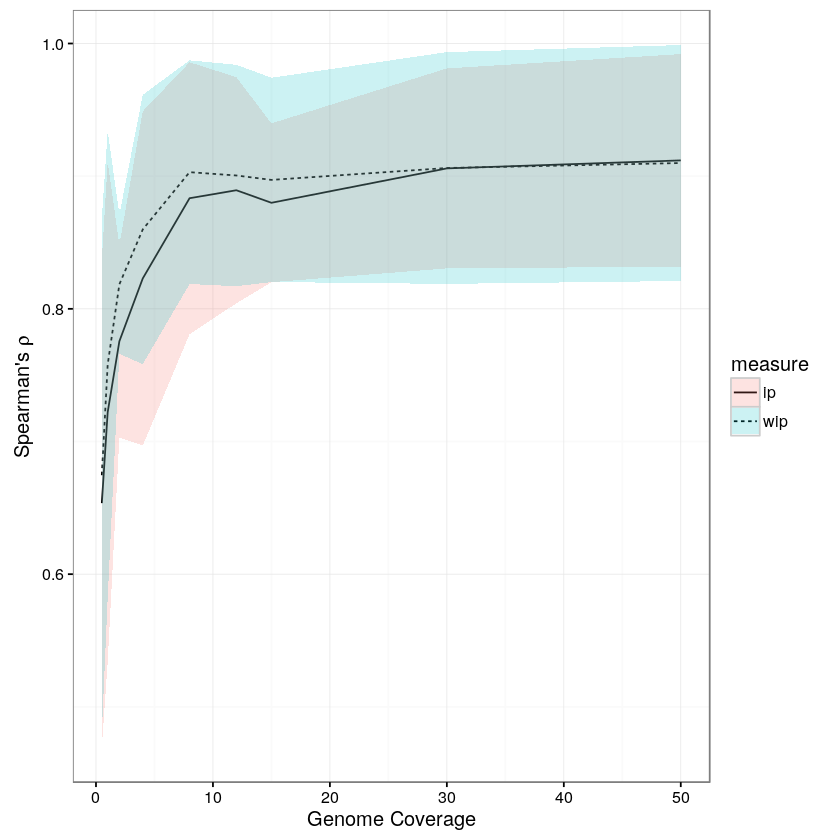

In [7]:
ggplot(csumm, aes(x=coverage, y=spearman_m, ymin=spearman_m-2*spearman_sd, ymax=spearman_m+2*spearman_sd, group=measure)) +
    geom_line(aes(linetype=measure)) +
    geom_ribbon(aes(fill=measure), alpha=0.2) +
    xlab('Genome Coverage') +
    ylab(expression(paste("Spearman's ", rho))) +
    #scale_x_log10()+
    theme_bw()

The differnce between WIP and IP is calculated here

In [8]:
cdiff = dcast(coverage, coverage * rep~ measure, value.var="spearman")
#cdiff = ddply(cdiff, .(coverage, rep), summarise, spearman_d=wip - ip)
cdiff = ddply(cdiff, .(coverage), summarise, diff_m=mean(wip - ip), diff_sd=sd(wip - ip))

summary(cdiff)

    coverage         diff_m             diff_sd       
 Min.   : 0.50   Min.   :-0.001986   Min.   :0.02256  
 1st Qu.: 2.00   1st Qu.: 0.011124   1st Qu.:0.02436  
 Median : 8.00   Median : 0.019634   Median :0.02872  
 Mean   :13.61   Mean   : 0.020349   Mean   :0.02780  
 3rd Qu.:15.00   3rd Qu.: 0.035914   3rd Qu.:0.03186  
 Max.   :50.00   Max.   : 0.042926   Max.   :0.03412  

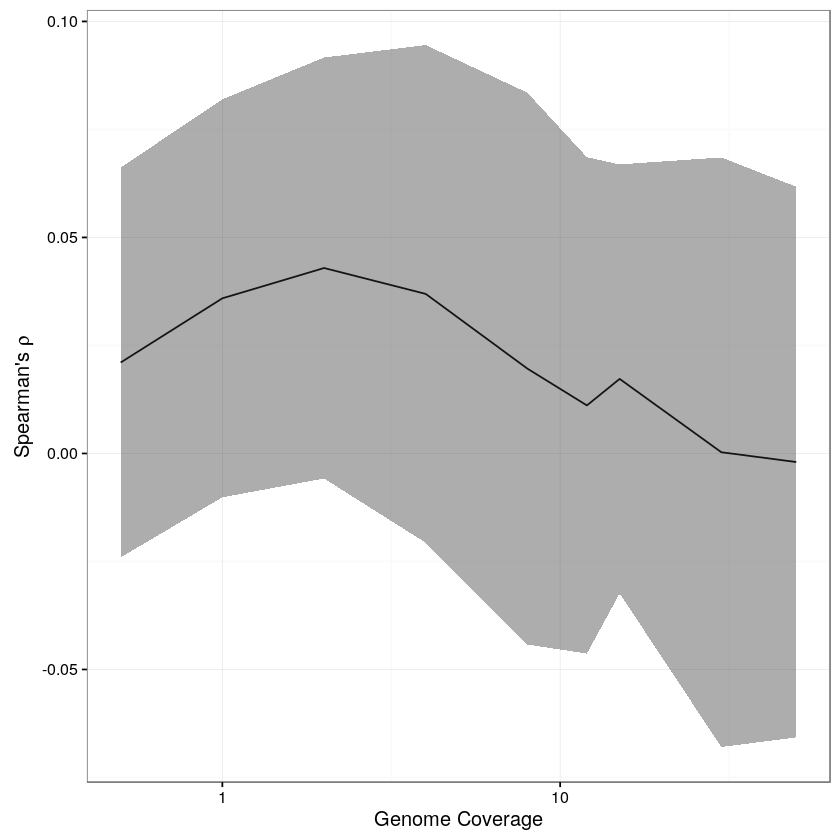

In [9]:
ggplot(cdiff, aes(x=coverage, y=diff_m, ymin=diff_m-2*diff_sd, ymax=diff_m+2*diff_sd)) +
    geom_line() +
    geom_ribbon(alpha=0.4) +
    xlab('Genome Coverage') +
    ylab(expression(paste("Spearman's ", rho))) +
    scale_x_log10()+
    theme_bw() 

There is no signficant difference between the two methods (0 is never outside the confidence interval).

Coverage vs $\rho$ at the lower 1/1000 varants
------------------

A series of average coverages was run at the scale of 0.001 (i.e. an average of 1 variant in 1000 bases across all pairwise comparisions of samples)

In [10]:
coverage = stats[stats$scale==0.001, ]
coverage$scale = NULL
summary(coverage)

    coverage     measure     spearman             rep    
 Min.   : 0.50   ip :90   Min.   :-0.03518   1      :18  
 1st Qu.: 2.00   wip:90   1st Qu.: 0.25146   2      :18  
 Median : 8.00            Median : 0.52682   3      :18  
 Mean   :13.61            Mean   : 0.52261   4      :18  
 3rd Qu.:15.00            3rd Qu.: 0.82065   5      :18  
 Max.   :50.00            Max.   : 0.96309   6      :18  
                                             (Other):72  

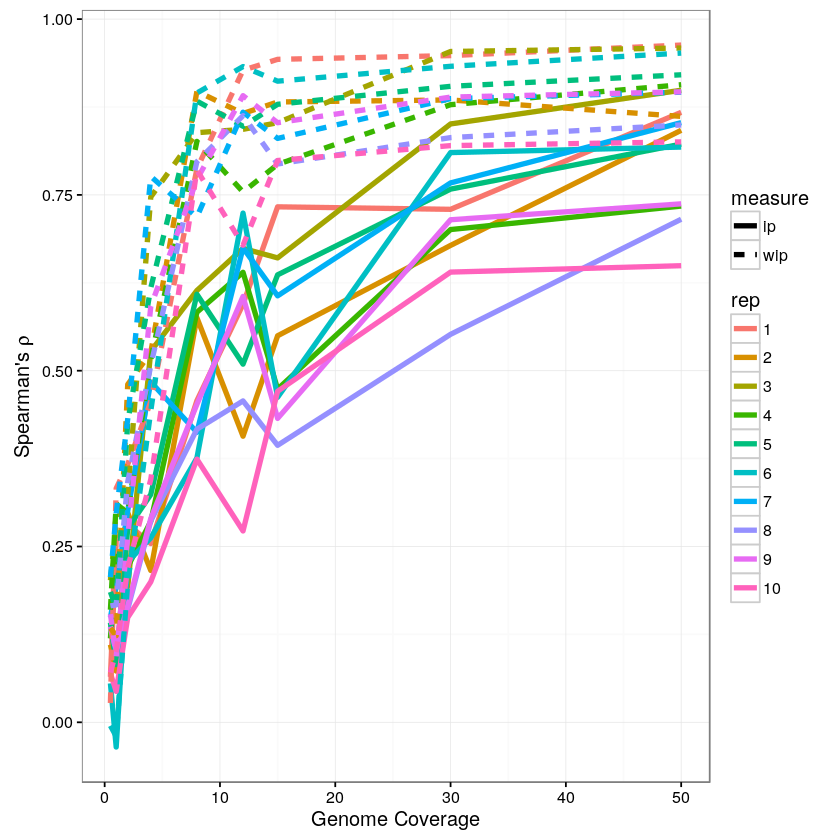

In [11]:
ggplot(coverage, aes(x=coverage, y=spearman, linetype=measure, color=rep)) +
    geom_line(aes(linetype=measure, color=rep),size=1.5) +
    xlab('Genome Coverage') +
    ylab(expression(paste("Spearman's ", rho))) +
    #scale_x_log10()+
    theme_bw() 

Here we summarise the replicates to averages $\pm$ SD.

In [12]:
csumm = ddply(coverage, .(coverage, measure), summarise,
                spearman_m=mean(spearman),
                spearman_sd=sd(spearman))
summary(csumm)

    coverage     measure   spearman_m      spearman_sd     
 Min.   : 0.50   ip :9   Min.   :0.1186   Min.   :0.04460  
 1st Qu.: 2.00   wip:9   1st Qu.:0.2487   1st Qu.:0.05905  
 Median : 8.00           Median :0.5472   Median :0.08272  
 Mean   :13.61           Mean   :0.5226   Mean   :0.08479  
 3rd Qu.:15.00           3rd Qu.:0.8135   3rd Qu.:0.10580  
 Max.   :50.00           Max.   :0.9030   Max.   :0.14222  

You can see below that WIP marginally outperforms IP, at low coverage. Above about 20x, I would say that WIP and IP have equivalent performance.

The ribbon is 2 SD, so this time there could be signficant differences.

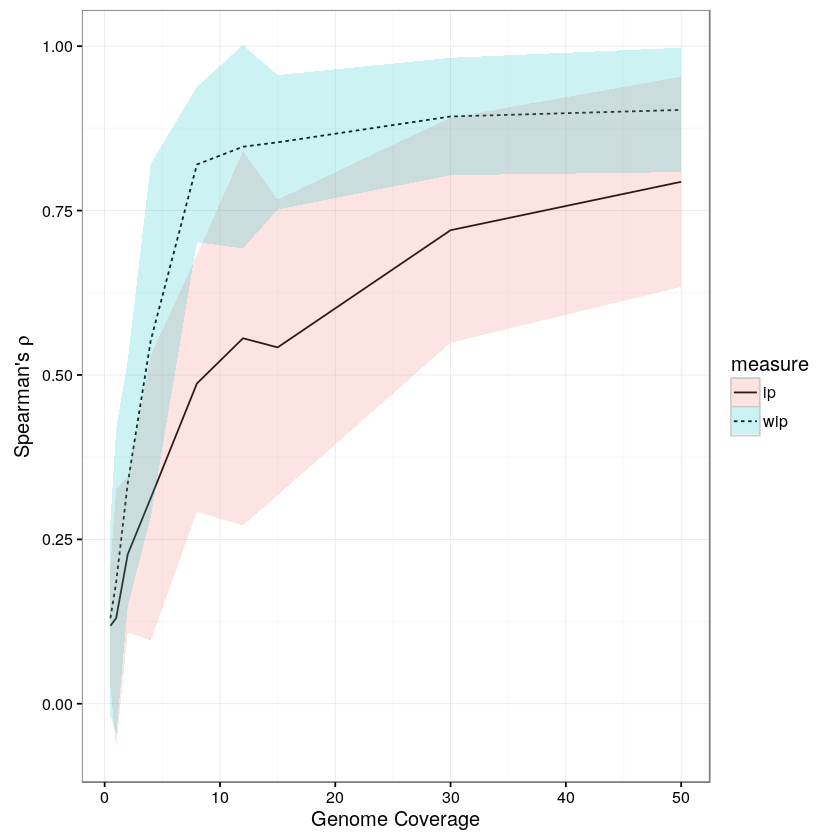

In [13]:
ggplot(csumm, aes(x=coverage, y=spearman_m, ymin=spearman_m-2*spearman_sd, ymax=spearman_m+2*spearman_sd, group=measure)) +
    geom_line(aes(linetype=measure)) +
    geom_ribbon(aes(fill=measure), alpha=0.2) +
    xlab('Genome Coverage') +
    ylab(expression(paste("Spearman's ", rho))) +
    #scale_x_log10()+
    theme_bw()

The differnce between WIP and IP is calculated here

In [14]:
cdiff = dcast(coverage, coverage * rep~ measure, value.var="spearman")
#cdiff = ddply(cdiff, .(coverage, rep), summarise, spearman_d=wip - ip)
cdiff = ddply(cdiff, .(coverage), summarise, diff_m=mean(wip - ip), diff_sd=sd(wip - ip))

summary(cdiff)

    coverage         diff_m           diff_sd       
 Min.   : 0.50   Min.   :0.01143   Min.   :0.03347  
 1st Qu.: 2.00   1st Qu.:0.10769   1st Qu.:0.05340  
 Median : 8.00   Median :0.17289   Median :0.05689  
 Mean   :13.61   Mean   :0.18132   Mean   :0.06598  
 3rd Qu.:15.00   3rd Qu.:0.29125   3rd Qu.:0.08649  
 Max.   :50.00   Max.   :0.33305   Max.   :0.11603  

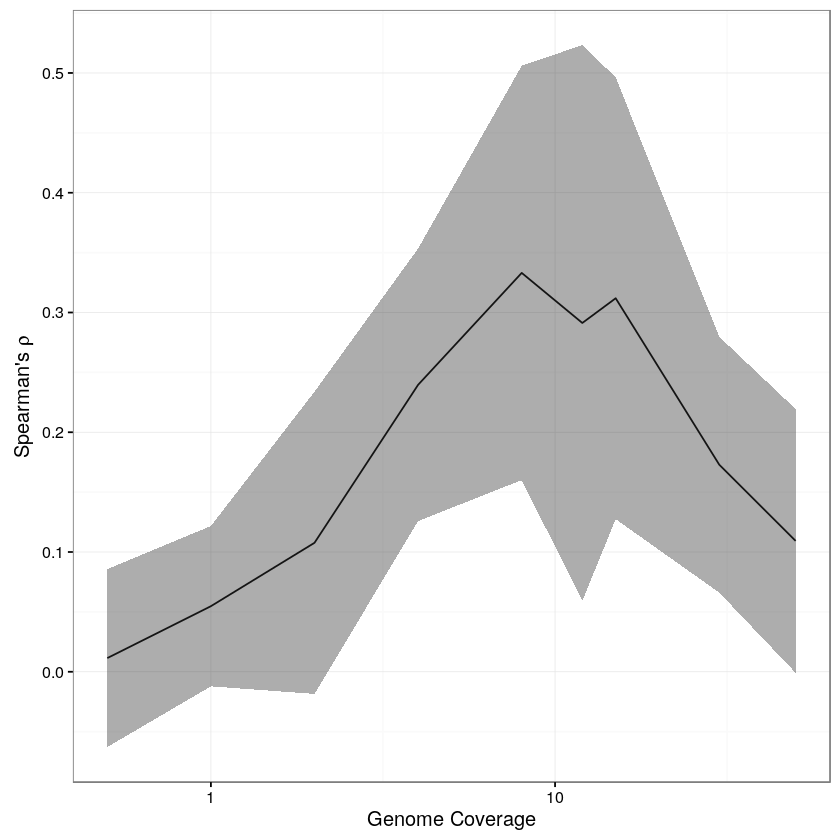

In [15]:
ggplot(cdiff, aes(x=coverage, y=diff_m, ymin=diff_m-2*diff_sd, ymax=diff_m+2*diff_sd)) +
    geom_line() +
    geom_ribbon(alpha=0.4) +
    xlab('Genome Coverage') +
    ylab(expression(paste("Spearman's ", rho))) +
    scale_x_log10()+
    theme_bw() 

Coverage vs $\rho$ at 1/1000
------------------

A series of average coverages was run at the scale of 0.001 (i.e. an average of 1 variant in 1000 bases across all pairwise comparisions of samples)

In [16]:
coverage = stats[stats$scale==0.001, ]
coverage$scale = NULL
summary(coverage)

    coverage     measure     spearman             rep    
 Min.   : 0.50   ip :90   Min.   :-0.03518   1      :18  
 1st Qu.: 2.00   wip:90   1st Qu.: 0.25146   2      :18  
 Median : 8.00            Median : 0.52682   3      :18  
 Mean   :13.61            Mean   : 0.52261   4      :18  
 3rd Qu.:15.00            3rd Qu.: 0.82065   5      :18  
 Max.   :50.00            Max.   : 0.96309   6      :18  
                                             (Other):72  

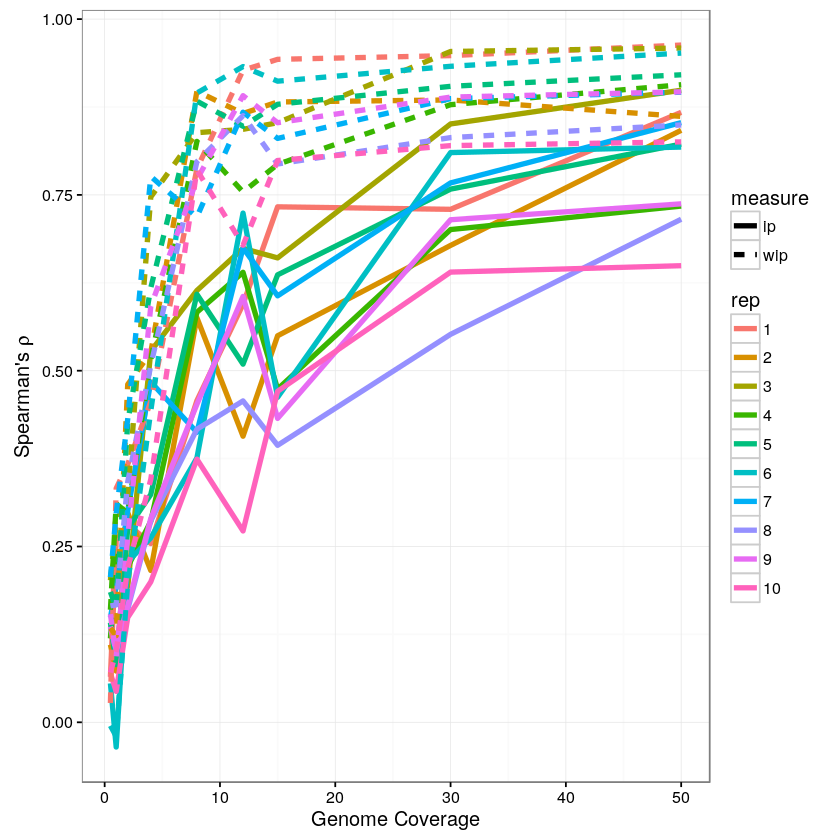

In [17]:
ggplot(coverage, aes(x=coverage, y=spearman, linetype=measure, color=rep)) +
    geom_line(aes(linetype=measure, color=rep),size=1.5) +
    xlab('Genome Coverage') +
    ylab(expression(paste("Spearman's ", rho))) +
    #scale_x_log10()+
    theme_bw() 

Here we summarise the replicates to averages $\pm$ SD. Note that we exclude replicate 8 as it is an outlier for both IP and WIP metrics (see above).

In [18]:
coverage = coverage[coverage$rep != 8,]
csumm = ddply(coverage, .(coverage, measure), summarise,
                spearman_m=mean(spearman),
                spearman_sd=sd(spearman))
summary(csumm)

    coverage     measure   spearman_m      spearman_sd     
 Min.   : 0.50   ip :9   Min.   :0.1168   Min.   :0.04137  
 1st Qu.: 2.00   wip:9   1st Qu.:0.2549   1st Qu.:0.05864  
 Median : 8.00           Median :0.5580   Median :0.08066  
 Mean   :13.61           Mean   :0.5280   Mean   :0.08569  
 3rd Qu.:15.00           3rd Qu.:0.8175   3rd Qu.:0.10514  
 Max.   :50.00           Max.   :0.9090   Max.   :0.14629  

You can see below that WIP marginally outperforms IP, at low coverage. Above about 20x, I would say that WIP and IP have equivalent performance.

The ribbon is 1 SD, so there is certainly no signficant difference.

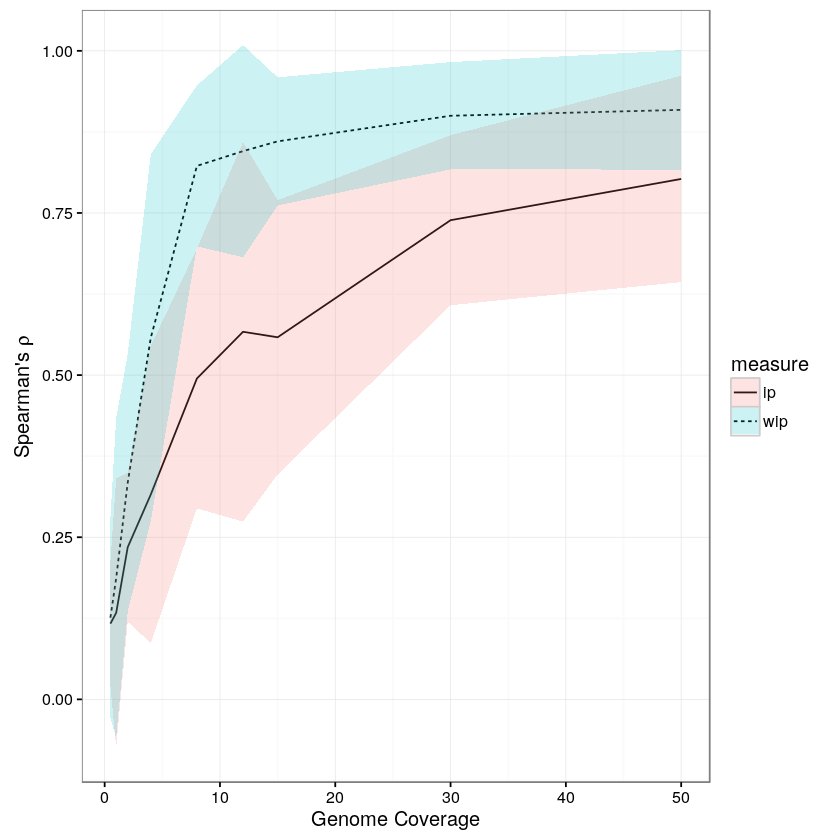

In [22]:
ggplot(csumm, aes(x=coverage, y=spearman_m, ymin=spearman_m-2*spearman_sd, ymax=spearman_m+2*spearman_sd, group=measure)) +
    geom_line(aes(linetype=measure)) +
    geom_ribbon(aes(fill=measure), alpha=0.2) +
    xlab('Genome Coverage') +
    ylab(expression(paste("Spearman's ", rho))) +
    #scale_x_log10()+
    theme_bw()

The differnce between WIP and IP is calculated here

In [20]:
cdiff = dcast(coverage, coverage * rep~ measure, value.var="spearman")
#cdiff = ddply(cdiff, .(coverage, rep), summarise, spearman_d=wip - ip)
cdiff = ddply(cdiff, .(coverage), summarise, diff_m=mean(wip - ip), diff_sd=sd(wip - ip))

summary(cdiff)

    coverage         diff_m            diff_sd       
 Min.   : 0.50   Min.   :0.009244   Min.   :0.03529  
 1st Qu.: 2.00   1st Qu.:0.099516   1st Qu.:0.04027  
 Median : 8.00   Median :0.161011   Median :0.05995  
 Mean   :13.61   Mean   :0.175554   Mean   :0.06561  
 3rd Qu.:15.00   3rd Qu.:0.278540   3rd Qu.:0.09003  
 Max.   :50.00   Max.   :0.327785   Max.   :0.11544  

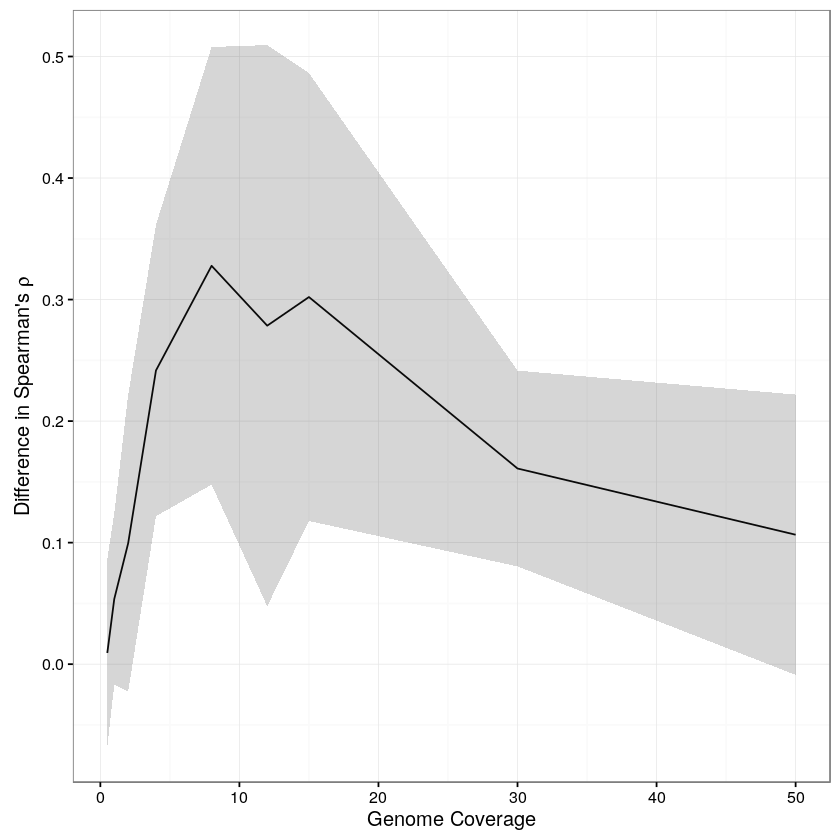

In [21]:
ggplot(cdiff, aes(x=coverage, y=diff_m, ymin=diff_m-2*diff_sd, ymax=diff_m+2*diff_sd)) +
    geom_line() +
    geom_ribbon(alpha=0.2) +
    xlab('Genome Coverage') +
    ylab(expression(paste("Difference in Spearman's ", rho))) +
    #scale_x_log10()+
    theme_bw() 

So in terms of pairwise differences in performance between WIP and IP, there is a signfincant improvement above about 2x (below which they are both pretty crap)

Conclusions
-----------

As expected
- I think there might be an issue with the way I normalise trees. I think that we are probably at a higher level of divergence than I expect if we use the mean. I will do a run with a couple of reps using the maximum distance set to 1.0, i.e. that the entire tree scale is 0.5 (from root to tip, and then back again =1.0).